In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics

oil_prices = pd.read_csv("DCOILWTICO.csv", sep=",")
covid_data = pd.read_csv("national-history.csv")

# We will use DATE and PRICES from the first data
# We will only use date and positiveIncrease columns from the second csv file

#Sorting the data with date
covid_data['date'] = pd.to_datetime(covid_data['date'], infer_datetime_format= True)
covid_data.sort_values(by = 'date', ascending = True, inplace = True) 


oil_prices['date'] = pd.to_datetime(oil_prices.date)

#merge datasets
merged_data = pd.merge(oil_prices, covid_data)
merged_data = merged_data.fillna(0)
merged_data["prices"].apply(lambda x: float(x.replace(",", ".")) if type(x) is str else float(x))
merged_data.head(10)

ValueError: could not convert string to float: '.'

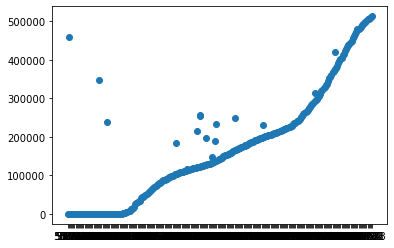

In [72]:
x = merged_data["prices"]
y = merged_data["death"]
# plt.xticks(x[::2],  rotation='vertical')

plt.scatter(x, y)
plt.show()

In [81]:
def outlier_iqr(data):

    for i in range(len(data.columns)):

        col = data.iloc[:,i]

        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 

        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return data
outlier_iqr(merged_data)
print(outlier_iqr)

/var/folders/n7/3n_b4tk93ys14tjz4_10j_zh0000gn/T/ipykernel_3397/1880566132.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  q1 = col.describe()['25%']


KeyError: '25%'